In [1409]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1410]:
train = pd.read_csv(r"C:/Users/Yash/Downloads/Property_Price_Train.csv")
test = pd.read_csv(r"C:/Users/Yash/Downloads/Property_Price_Test.csv")

In [1411]:
print(train.shape)
print(test.shape)

(1459, 81)
(1459, 80)


In [1412]:
train.head(5)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1413]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [1414]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1455 non-null   object 
 3   Lot_Extent                 1232 non-null   float64
 4   Lot_Size                   1459 non-null   float64
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  107 non-null    object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1457 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

# dropdown unwanted columns 

In [1415]:
train.drop(['Miscellaneous_Feature'], axis = 1,inplace = True)
train.drop(['Pool_Quality'], axis = 1,inplace = True)
train.drop(['Fireplace_Quality'], axis = 1,inplace = True)
train.drop(['Lane_Type'], axis = 1,inplace = True)
train.drop(['Fence_Quality'], axis = 1,inplace = True)
train.drop(['Brick_Veneer_Area'], axis = 1,inplace = True)
train.drop(['BsmtFinSF1'], axis = 1,inplace = True)
train.drop(['BsmtFinSF2'], axis = 1,inplace = True)
train.drop(['Second_Floor_Area'], axis = 1,inplace = True)
train.drop(['LowQualFinSF'], axis = 1,inplace = True)
train.drop(['Three_Season_Lobby_Area'], axis = 1,inplace = True)
train.drop(['Screen_Lobby_Area'], axis = 1,inplace = True)
train.drop(['Pool_Area'], axis = 1,inplace = True)
train.drop(['Miscellaneous_Value'], axis = 1,inplace = True)
train.drop(['Underground_Half_Bathroom'], axis = 1,inplace = True)
train.drop(['Half_Bathroom_Above_Grade'], axis = 1,inplace = True)
train.drop(['Kitchen_Above_Grade'], axis = 1,inplace = True)
train.drop(['Exterior_Material'], axis = 1,inplace = True)
train.drop(['Basement_Height'], axis = 1,inplace = True)
train.drop(['Exposure_Level'], axis = 1,inplace = True)
train.drop(['Kitchen_Quality'], axis = 1,inplace = True)
test.drop(['Kitchen_Quality'], axis = 1,inplace = True)
test.drop(['Exposure_Level'], axis = 1,inplace = True)
test.drop(['Basement_Height'], axis = 1,inplace = True)
test.drop(['Exterior_Material'], axis = 1,inplace = True)
test.drop(['Kitchen_Above_Grade'], axis = 1,inplace = True)
test.drop(['Half_Bathroom_Above_Grade'], axis = 1,inplace = True)
test.drop(['Underground_Half_Bathroom'], axis = 1,inplace = True)
test.drop(['Miscellaneous_Value'], axis = 1,inplace = True)
test.drop(['Pool_Area'], axis = 1,inplace = True)
test.drop(['Screen_Lobby_Area'], axis = 1,inplace = True)
test.drop(['Three_Season_Lobby_Area'], axis = 1,inplace = True)
test.drop(['LowQualFinSF'], axis = 1,inplace = True)
test.drop(['Second_Floor_Area'], axis = 1,inplace = True)
test.drop(['BsmtFinSF2'], axis = 1,inplace = True)
test.drop(['BsmtFinSF1'], axis = 1,inplace = True)
test.drop(['Brick_Veneer_Area'], axis = 1,inplace = True)
test.drop(['Miscellaneous_Feature'], axis = 1,inplace = True)
test.drop(['Pool_Quality'], axis = 1,inplace = True)
test.drop(['Fireplace_Quality'], axis = 1,inplace = True)
test.drop(['Lane_Type'], axis = 1,inplace = True)
test.drop(['Fence_Quality'], axis = 1,inplace = True)


In [1416]:
print(train.shape)
print(test.shape)

(1459, 60)
(1459, 59)


In [1417]:
train.head(5)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,...,TA,Y,163.788080,69.596115,20.337934,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,...,TA,Y,198.900074,74.716033,15.039392,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,...,TA,Y,26.127533,32.085268,-46.232198,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,...,TA,Y,46.948018,40.181415,60.921821,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,...,TA,Y,-10.626105,20.755323,21.788818,12,2008,WD,Normal,250000


# NULL VALUE TREATMENT

In [1418]:
train["Lot_Extent"] = train["Lot_Extent"].fillna(train["Lot_Extent"].median())
test["Lot_Extent"] = test["Lot_Extent"].fillna(test["Lot_Extent"].median())

In [1419]:
train["Brick_Veneer_Type"] = train["Brick_Veneer_Type"].fillna("BrkCmn")
test["Brick_Veneer_Type"] = test["Brick_Veneer_Type"].fillna("BrkCmn")

In [1420]:
train["Basement_Condition"] = train["Basement_Condition"].fillna("Po")
test["Basement_Condition"] = test["Basement_Condition"].fillna("Po")

In [1421]:
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("LwQ")
test["BsmtFinType1"] = test["BsmtFinType1"].fillna("LwQ")

In [1422]:
train["BsmtFinType2"] = train["BsmtFinType2"].fillna("GLQ")
test["BsmtFinType2"] = test["BsmtFinType2"].fillna("GLQ")

In [1423]:
train["Garage"] = train["Garage"].fillna("2Types")
test["Garage"] = test["Garage"].fillna("2Types")

In [1424]:
train["Garage_Built_Year"] = train["Garage_Built_Year"].fillna(train["Garage_Built_Year"].median())
test["Garage_Built_Year"] = test["Garage_Built_Year"].fillna(test["Garage_Built_Year"].median())

In [1425]:
train["Garage_Quality"] = train["Garage_Quality"].fillna("Gd")
test["Garage_Quality"] = test["Garage_Quality"].fillna("Gd")

In [1426]:
train["Garage_Condition"] = train["Garage_Condition"].fillna("Ex")
test["Garage_Condition"] = test["Garage_Condition"].fillna("Ex")

In [1427]:
train["Electrical_System"] = train["Electrical_System"].fillna("Mix")


In [1428]:
train["Garage_Finish_Year"] = train["Garage_Finish_Year"].fillna("Fin")
test["Garage_Finish_Year"] = train["Garage_Finish_Year"].fillna("Fin")

In [1429]:
test["Zoning_Class"] = train["Zoning_Class"].fillna("RHD")

In [1430]:
test["Utility_Type"] = train["Utility_Type"].fillna("AllPub")

In [1431]:
test["Exterior1st"] = train["Exterior1st"].fillna("CB")

In [1432]:
test["Exterior2nd"] = train["Exterior2nd"].fillna("Stone")

In [1433]:
test["BsmtUnfSF"] = test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].median())


In [1434]:
test["Total_Basement_Area"] = test["Total_Basement_Area"].fillna(test["Total_Basement_Area"].median())

In [1435]:
test["Underground_Full_Bathroom"] = test["Underground_Full_Bathroom"].fillna(3.0)

In [1436]:
test["Functional_Rate"] = test["Functional_Rate"].fillna("MS")

In [1437]:
test["Garage_Size"] = test["Garage_Size"].fillna(5.0)

In [1438]:
test["Garage_Area"] = test["Garage_Area"].fillna(test["Garage_Area"].median())

In [1439]:
test["Sale_Type"] = test["Sale_Type"].fillna("Con")

# DTYPE CONVERTION USING LABEL ENCODER

In [1440]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1441]:
train.Zoning_Class  = le.fit_transform(train.Zoning_Class)
test.Zoning_Class  = le.fit_transform(test.Zoning_Class)

In [1442]:
train.Road_Type  = le.fit_transform(train.Road_Type)
test.Road_Type  = le.fit_transform(test.Road_Type)


In [1443]:
train.Property_Shape  = le.fit_transform(train.Property_Shape)
test.Property_Shape  = le.fit_transform(test.Property_Shape)

In [1444]:
train.Land_Outline  = le.fit_transform(train.Land_Outline)
test.Land_Outline  = le.fit_transform(test.Land_Outline)

In [1445]:
train.Utility_Type  = le.fit_transform(train.Utility_Type)
test.Utility_Type  = le.fit_transform(test.Utility_Type)

In [1446]:
train.Lot_Configuration  = le.fit_transform(train.Lot_Configuration)
test.Lot_Configuration  = le.fit_transform(test.Lot_Configuration)

In [1447]:
train.Property_Slope  = le.fit_transform(train.Property_Slope)
test.Property_Slope  = le.fit_transform(test.Property_Slope)

In [1448]:
train.Neighborhood  = le.fit_transform(train.Neighborhood)
test.Neighborhood  = le.fit_transform(test.Neighborhood)

In [1449]:
train.Condition1  = le.fit_transform(train.Condition1)
test.Condition1  = le.fit_transform(test.Condition1)

In [1450]:
train.Condition2  = le.fit_transform(train.Condition2)
test.Condition2  = le.fit_transform(test.Condition2)

In [1451]:
train.House_Type  = le.fit_transform(train.House_Type)
test.House_Type  = le.fit_transform(test.House_Type)

In [1452]:
train.House_Design  = le.fit_transform(train.House_Design)
test.House_Design  = le.fit_transform(test.House_Design)

In [1453]:
train.Roof_Design  = le.fit_transform(train.Roof_Design)
test.Roof_Design  = le.fit_transform(test.Roof_Design)

In [1454]:
train.Roof_Quality   = le.fit_transform(train.Roof_Quality )
test.Roof_Quality   = le.fit_transform(test.Roof_Quality )

In [1455]:
train.Exterior1st  = le.fit_transform(train.Exterior1st)
test.Exterior1st  = le.fit_transform(test.Exterior1st)

In [1456]:
train.Exterior2nd  = le.fit_transform(train.Exterior2nd)
test.Exterior2nd  = le.fit_transform(test.Exterior2nd)

In [1457]:
train.Brick_Veneer_Type  = le.fit_transform(train.Brick_Veneer_Type)
test.Brick_Veneer_Type  = le.fit_transform(test.Brick_Veneer_Type)

In [1458]:
train.Exterior_Condition  = le.fit_transform(train.Exterior_Condition)
test.Exterior_Condition  = le.fit_transform(test.Exterior_Condition)
train.Foundation_Type  = le.fit_transform(train.Foundation_Type)
test.Foundation_Type  = le.fit_transform(test.Foundation_Type)
train.Basement_Condition  = le.fit_transform(train.Basement_Condition)
test.Basement_Condition  = le.fit_transform(test.Basement_Condition)
train.BsmtFinType1  = le.fit_transform(train.BsmtFinType1)
test.BsmtFinType1  = le.fit_transform(test.BsmtFinType1)
train.BsmtFinType2  = le.fit_transform(train.BsmtFinType2)
test.BsmtFinType2  = le.fit_transform(test.BsmtFinType2)
train.Heating_Type  = le.fit_transform(train.Heating_Type)
test.Heating_Type  = le.fit_transform(test.Heating_Type)
train.Heating_Quality  = le.fit_transform(train.Heating_Quality)
test.Heating_Quality  = le.fit_transform(test.Heating_Quality)
train.Air_Conditioning  = le.fit_transform(train.Air_Conditioning)
test.Air_Conditioning  = le.fit_transform(test.Air_Conditioning)

In [1459]:
train.Electrical_System  = le.fit_transform(train.Electrical_System)
test.Electrical_System  = le.fit_transform(test.Electrical_System)


In [1460]:
train.Functional_Rate  = le.fit_transform(train.Functional_Rate)
test.Functional_Rate  = le.fit_transform(test.Functional_Rate)
train.Garage  = le.fit_transform(train.Garage)
test.Garage  = le.fit_transform(test.Garage)
train.Garage_Finish_Year  = le.fit_transform(train.Garage_Finish_Year)
test.Garage_Finish_Year  = le.fit_transform(test.Garage_Finish_Year)
train.Garage_Quality  = le.fit_transform(train.Garage_Quality)
test.Garage_Quality  = le.fit_transform(test.Garage_Quality)
train.Garage_Condition  = le.fit_transform(train.Garage_Condition)
test.Garage_Condition  = le.fit_transform(test.Garage_Condition)
train.Pavedd_Drive  = le.fit_transform(train.Pavedd_Drive)
test.Pavedd_Drive  = le.fit_transform(test.Pavedd_Drive)
train.Sale_Type  = le.fit_transform(train.Sale_Type)
test.Sale_Type  = le.fit_transform(test.Sale_Type)
train.Sale_Condition  = le.fit_transform(train.Sale_Condition)
test.Sale_Condition  = le.fit_transform(test.Sale_Condition)


In [1461]:
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

In [1462]:
print(train.shape)
print(test.shape)

(1459, 60)
(1459, 59)


In [1463]:
train.head(5)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,3,65.0,8450,1,3,3,0,4,...,4,2,163.788080,69.596115,20.337934,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,4,2,198.900074,74.716033,15.039392,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,4,2,26.127533,32.085268,-46.232198,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,4,2,46.948018,40.181415,60.921821,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,4,2,-10.626105,20.755323,21.788818,12,2008,8,4,250000


In [1464]:
data1 = train.corr()

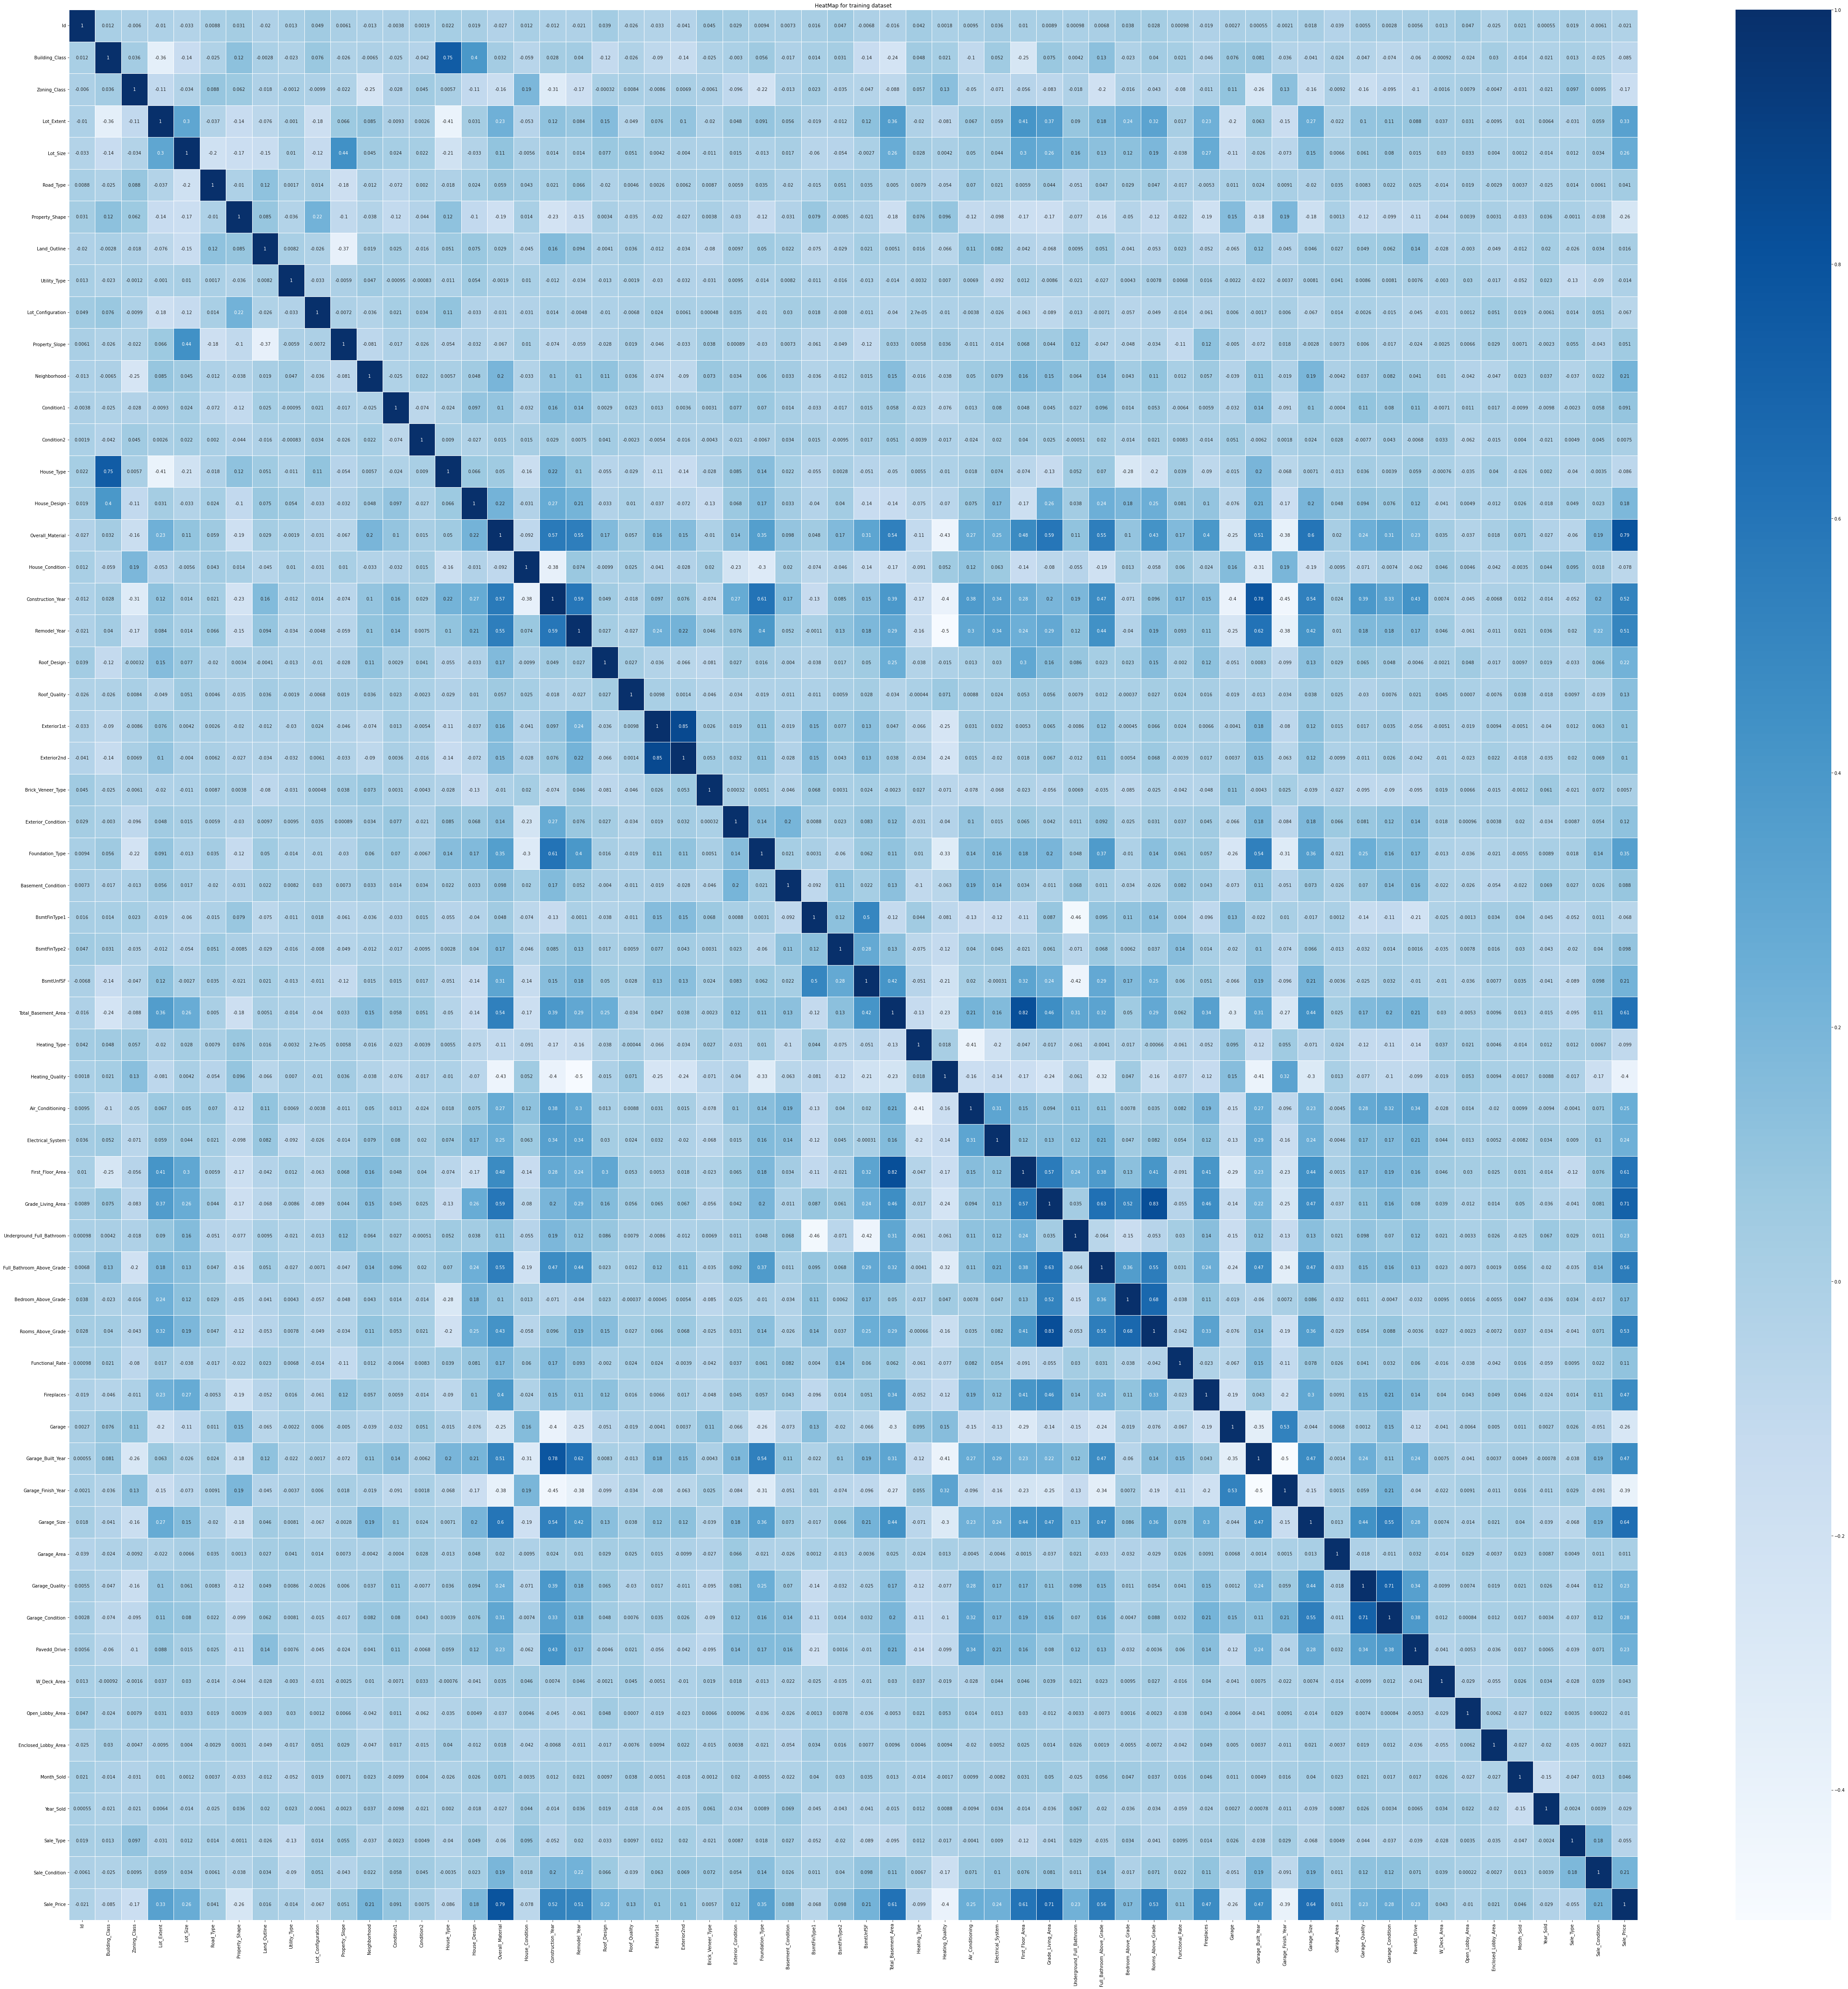

In [1465]:
plt.figure(figsize=(80,80))
heat_map = sns.heatmap( data1,linewidth = 1, annot=True,cmap = plt.cm.Blues)
plt.title( "HeatMap for training dataset" )
plt.show()

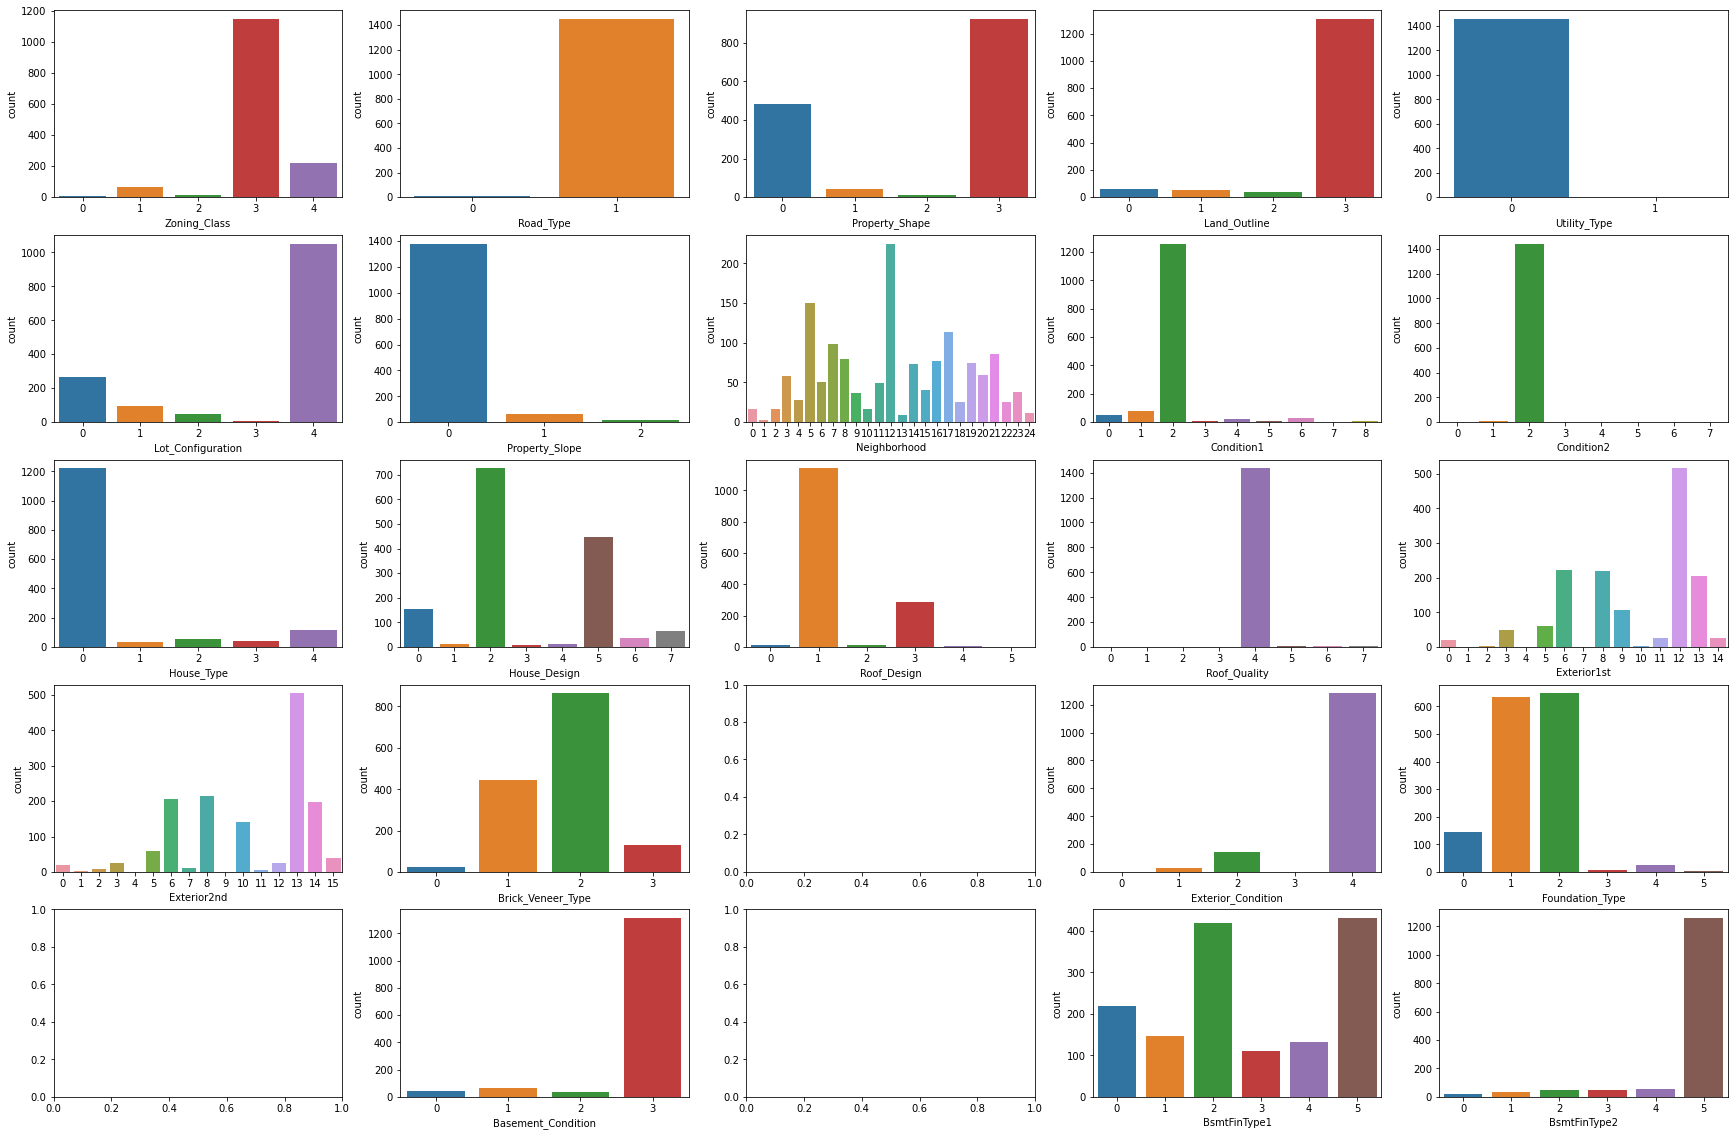

In [1466]:
fig,ax = plt.subplots(5,5,figsize = (30,20))
sns.countplot("Zoning_Class",data=train,ax=ax[0][0])
sns.countplot("Road_Type",data=train,ax=ax[0][1])
sns.countplot("Property_Shape",data=train,ax=ax[0][2])
sns.countplot("Land_Outline",data=train,ax=ax[0][3])
sns.countplot("Utility_Type",data=train,ax=ax[0][4])
sns.countplot("Lot_Configuration",data=train,ax=ax[1][0])
sns.countplot("Property_Slope",data=train,ax=ax[1][1])
sns.countplot("Neighborhood",data=train,ax=ax[1][2])
sns.countplot("Condition1",data=train,ax=ax[1][3])
sns.countplot("Condition2",data=train,ax=ax[1][4])
sns.countplot("House_Type",data=train,ax=ax[2][0])
sns.countplot("House_Design",data=train,ax=ax[2][1])
sns.countplot("Roof_Design",data=train,ax=ax[2][2])
sns.countplot("Roof_Quality",data=train,ax=ax[2][3])
sns.countplot("Exterior1st",data=train,ax=ax[2][4])
sns.countplot("Exterior2nd",data=train,ax=ax[3][0])
sns.countplot("Brick_Veneer_Type",data=train,ax=ax[3][1])
sns.countplot("Exterior_Condition",data=train,ax=ax[3][3])
sns.countplot("Foundation_Type",data=train,ax=ax[3][4])
sns.countplot("Basement_Condition",data=train,ax=ax[4][1])
sns.countplot("BsmtFinType1",data=train,ax=ax[4][3])
sns.countplot("BsmtFinType2",data=train,ax=ax[4][4])
plt.show()

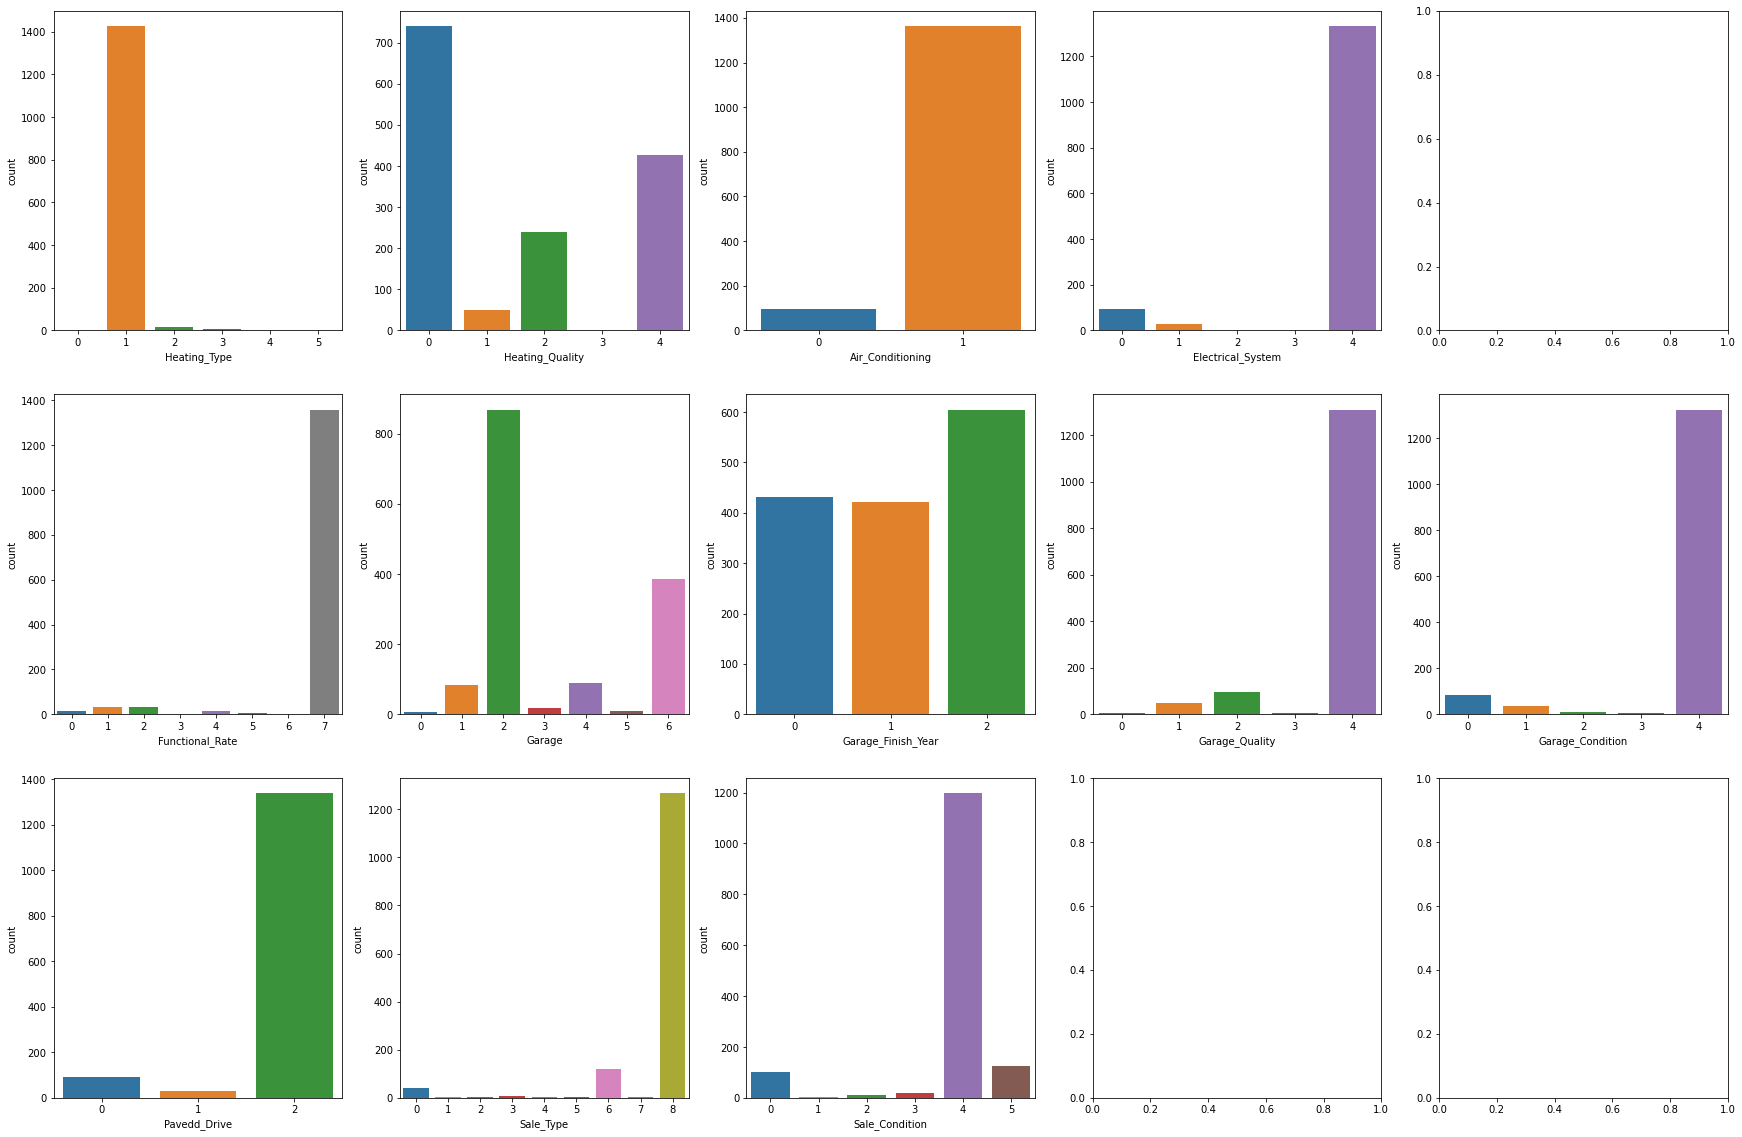

In [1467]:
fig,ax = plt.subplots(3,5,figsize = (30,20))
sns.countplot("Heating_Type",data=train,ax=ax[0][0])
sns.countplot("Heating_Quality",data=train,ax=ax[0][1])
sns.countplot("Air_Conditioning",data=train,ax=ax[0][2])
sns.countplot("Electrical_System",data=train,ax=ax[0][3])
sns.countplot("Functional_Rate",data=train,ax=ax[1][0])
sns.countplot("Garage",data=train,ax=ax[1][1])
sns.countplot("Garage_Finish_Year",data=train,ax=ax[1][2])
sns.countplot("Garage_Quality",data=train,ax=ax[1][3])
sns.countplot("Garage_Condition",data=train,ax=ax[1][4])
sns.countplot("Pavedd_Drive",data=train,ax=ax[2][0])
sns.countplot("Sale_Type",data=train,ax=ax[2][1])
sns.countplot("Sale_Condition",data=train,ax=ax[2][2])
plt.show()

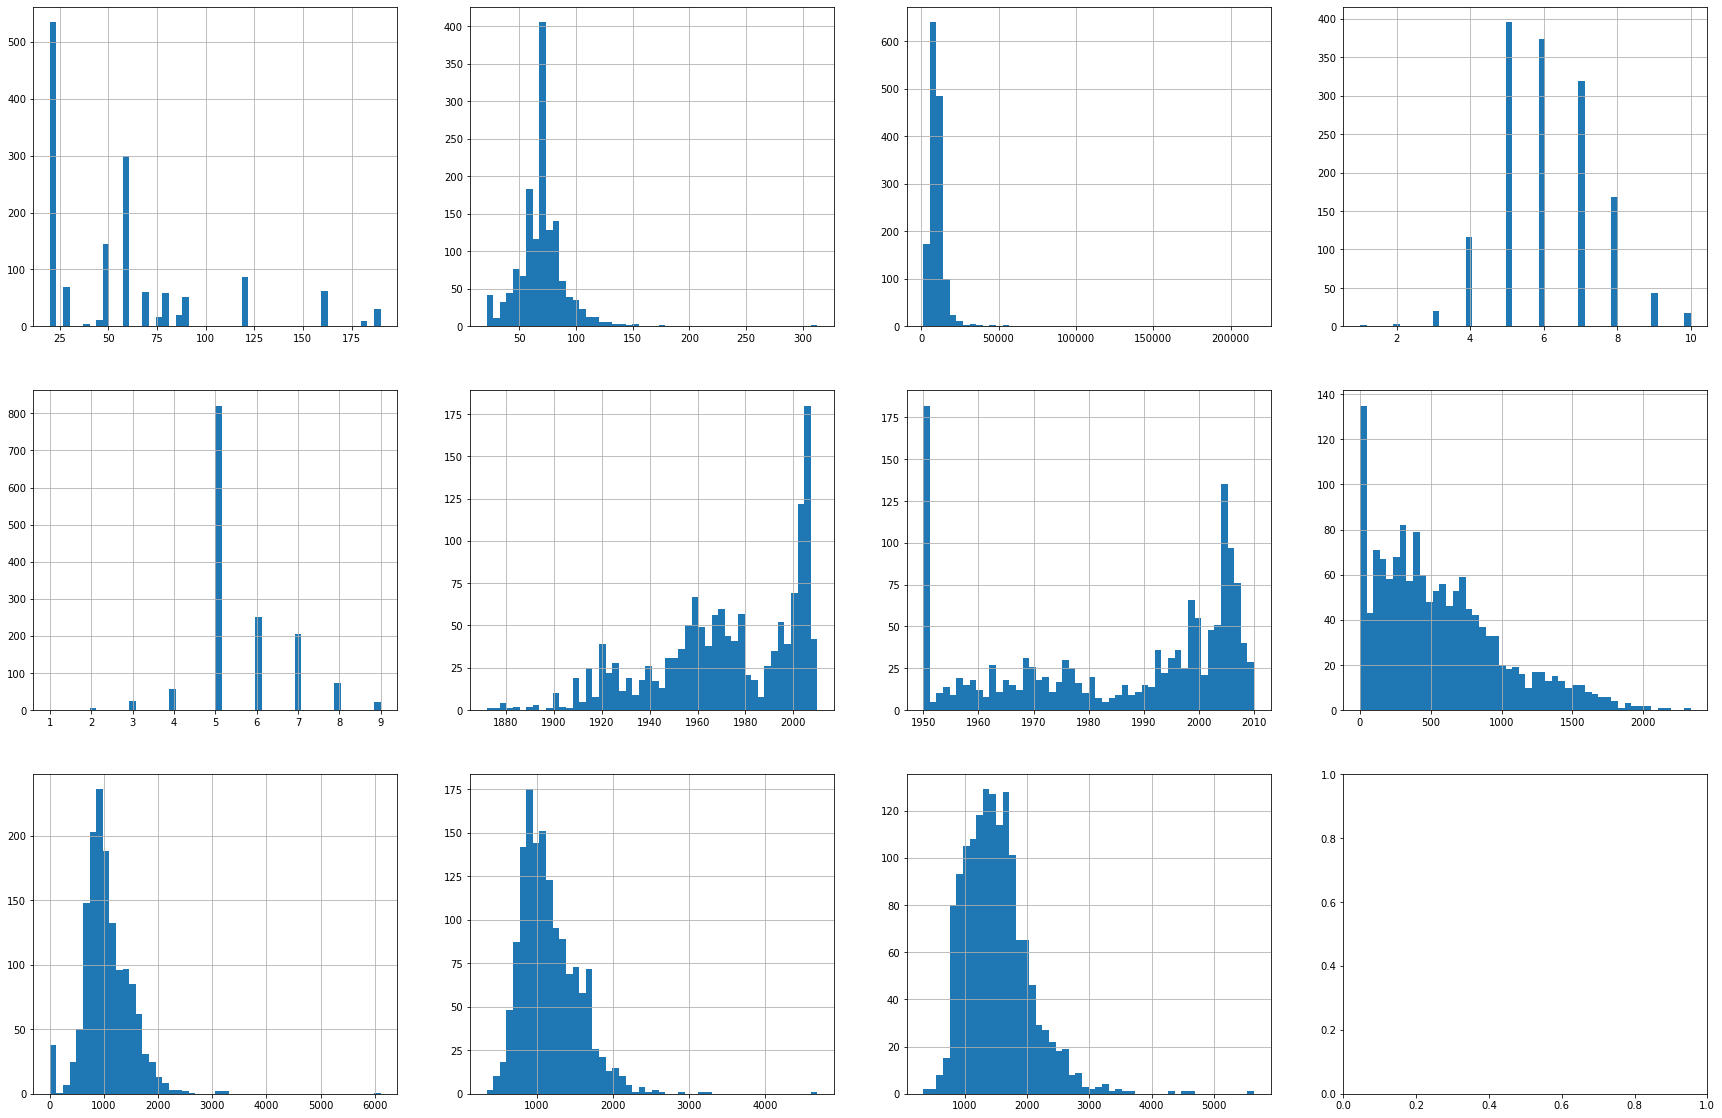

In [1468]:
fig,ax = plt.subplots(3,4,figsize = (30,20))
train["Building_Class"].hist(bins = 50,ax=ax[0][0])
train['Lot_Extent'].hist(bins = 50,ax=ax[0][1])
train['Lot_Size'].hist(bins = 50,ax=ax[0][2])
train["Overall_Material"].hist(bins = 50,ax=ax[0][3])
train["House_Condition"].hist(bins = 50,ax=ax[1][0])
train['Construction_Year'].hist(bins = 50,ax=ax[1][1])
train['Remodel_Year'].hist(bins = 50,ax=ax[1][2])
train['BsmtUnfSF'].hist(bins = 50,ax=ax[1][3])
train["Total_Basement_Area"].hist(bins = 50,ax=ax[2][0])
train["First_Floor_Area"].hist(bins = 50,ax=ax[2][1])
train["Grade_Living_Area"].hist(bins = 50,ax=ax[2][2])
plt.show()

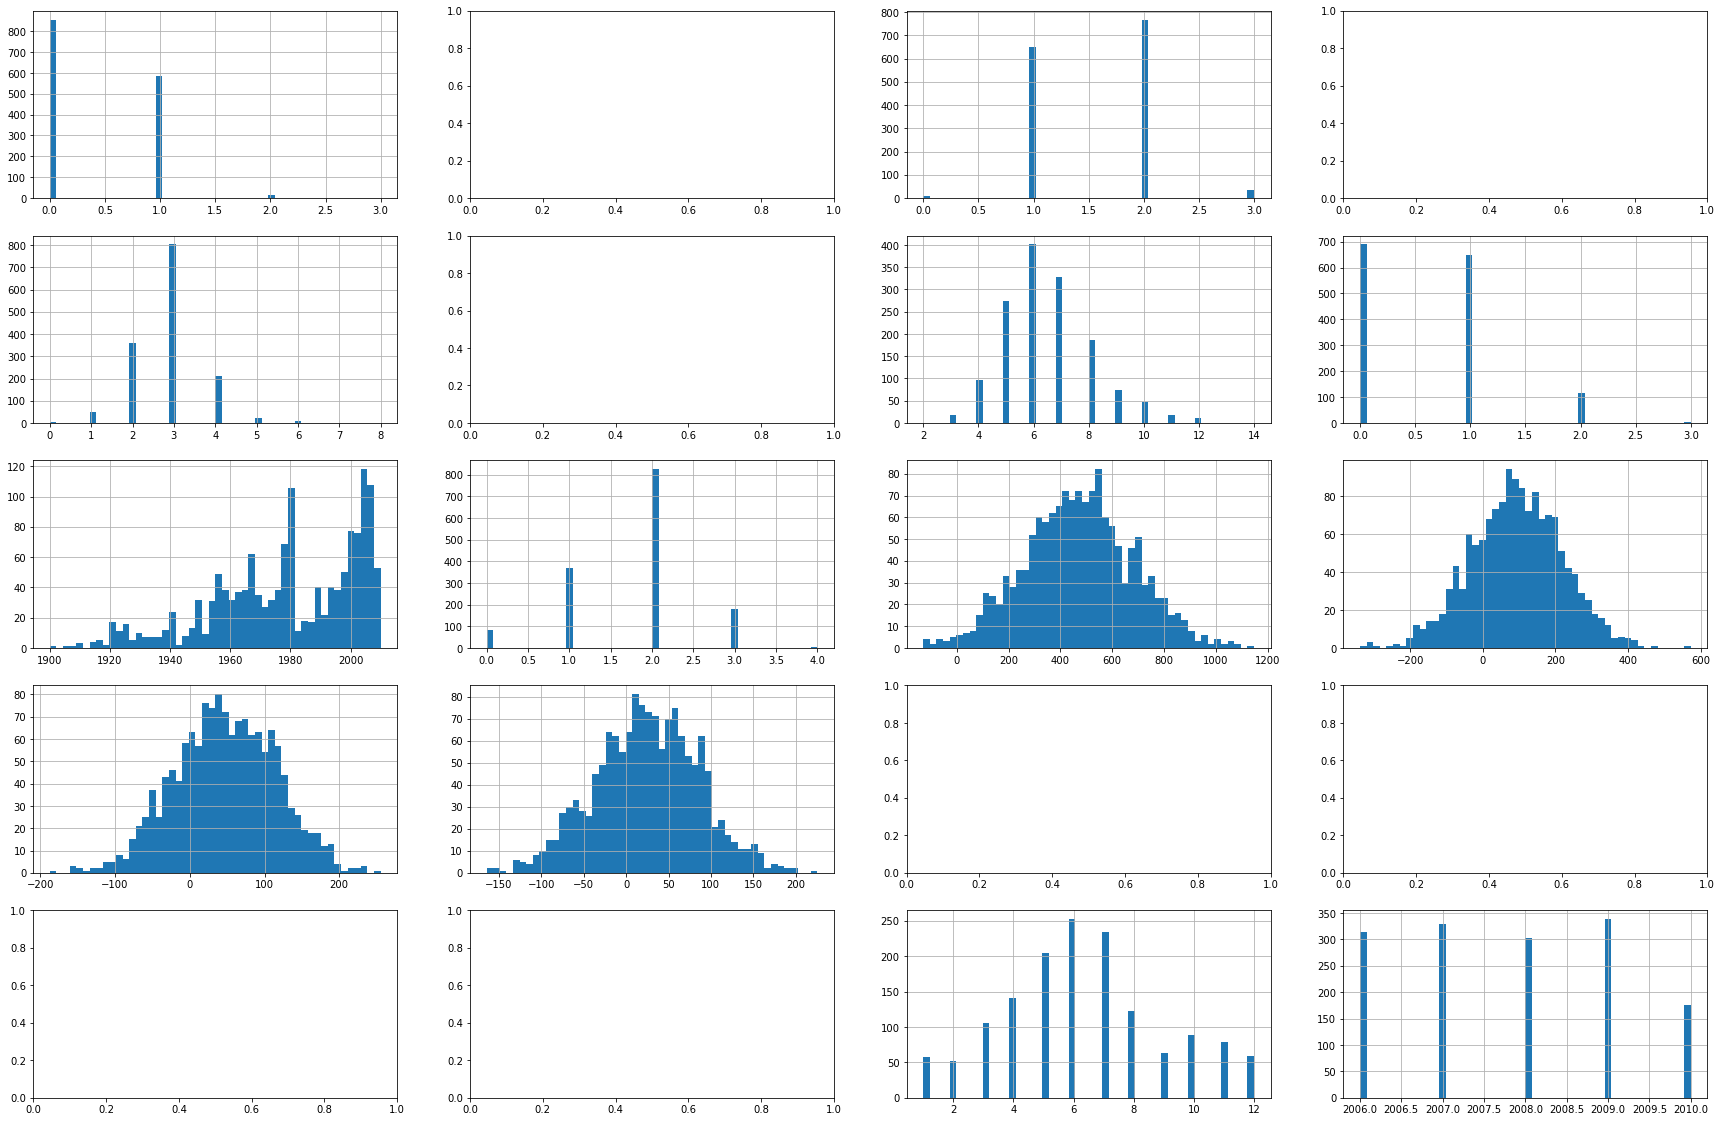

In [1469]:
fig,ax = plt.subplots(5,4,figsize = (30,20))
train["Underground_Full_Bathroom"].hist(bins = 50,ax=ax[0][0])
train['Full_Bathroom_Above_Grade'].hist(bins = 50,ax=ax[0][2])
train["Bedroom_Above_Grade"].hist(bins = 50,ax=ax[1][0])
train['Rooms_Above_Grade'].hist(bins = 50,ax=ax[1][2])
train["Fireplaces"].hist(bins = 50,ax=ax[1][3])
train["Garage_Built_Year"].hist(bins = 50,ax=ax[2][0])
train['Garage_Size'].hist(bins = 50,ax=ax[2][1])
train['Garage_Area'].hist(bins = 50,ax=ax[2][2])
train["W_Deck_Area"].hist(bins = 50,ax=ax[2][3])
train["Open_Lobby_Area"].hist(bins = 50,ax=ax[3][0])
train['Enclosed_Lobby_Area'].hist(bins = 50,ax=ax[3][1])
train['Month_Sold'].hist(bins = 50,ax=ax[4][2])
train["Year_Sold"].hist(bins = 50,ax=ax[4][3])
plt.show()

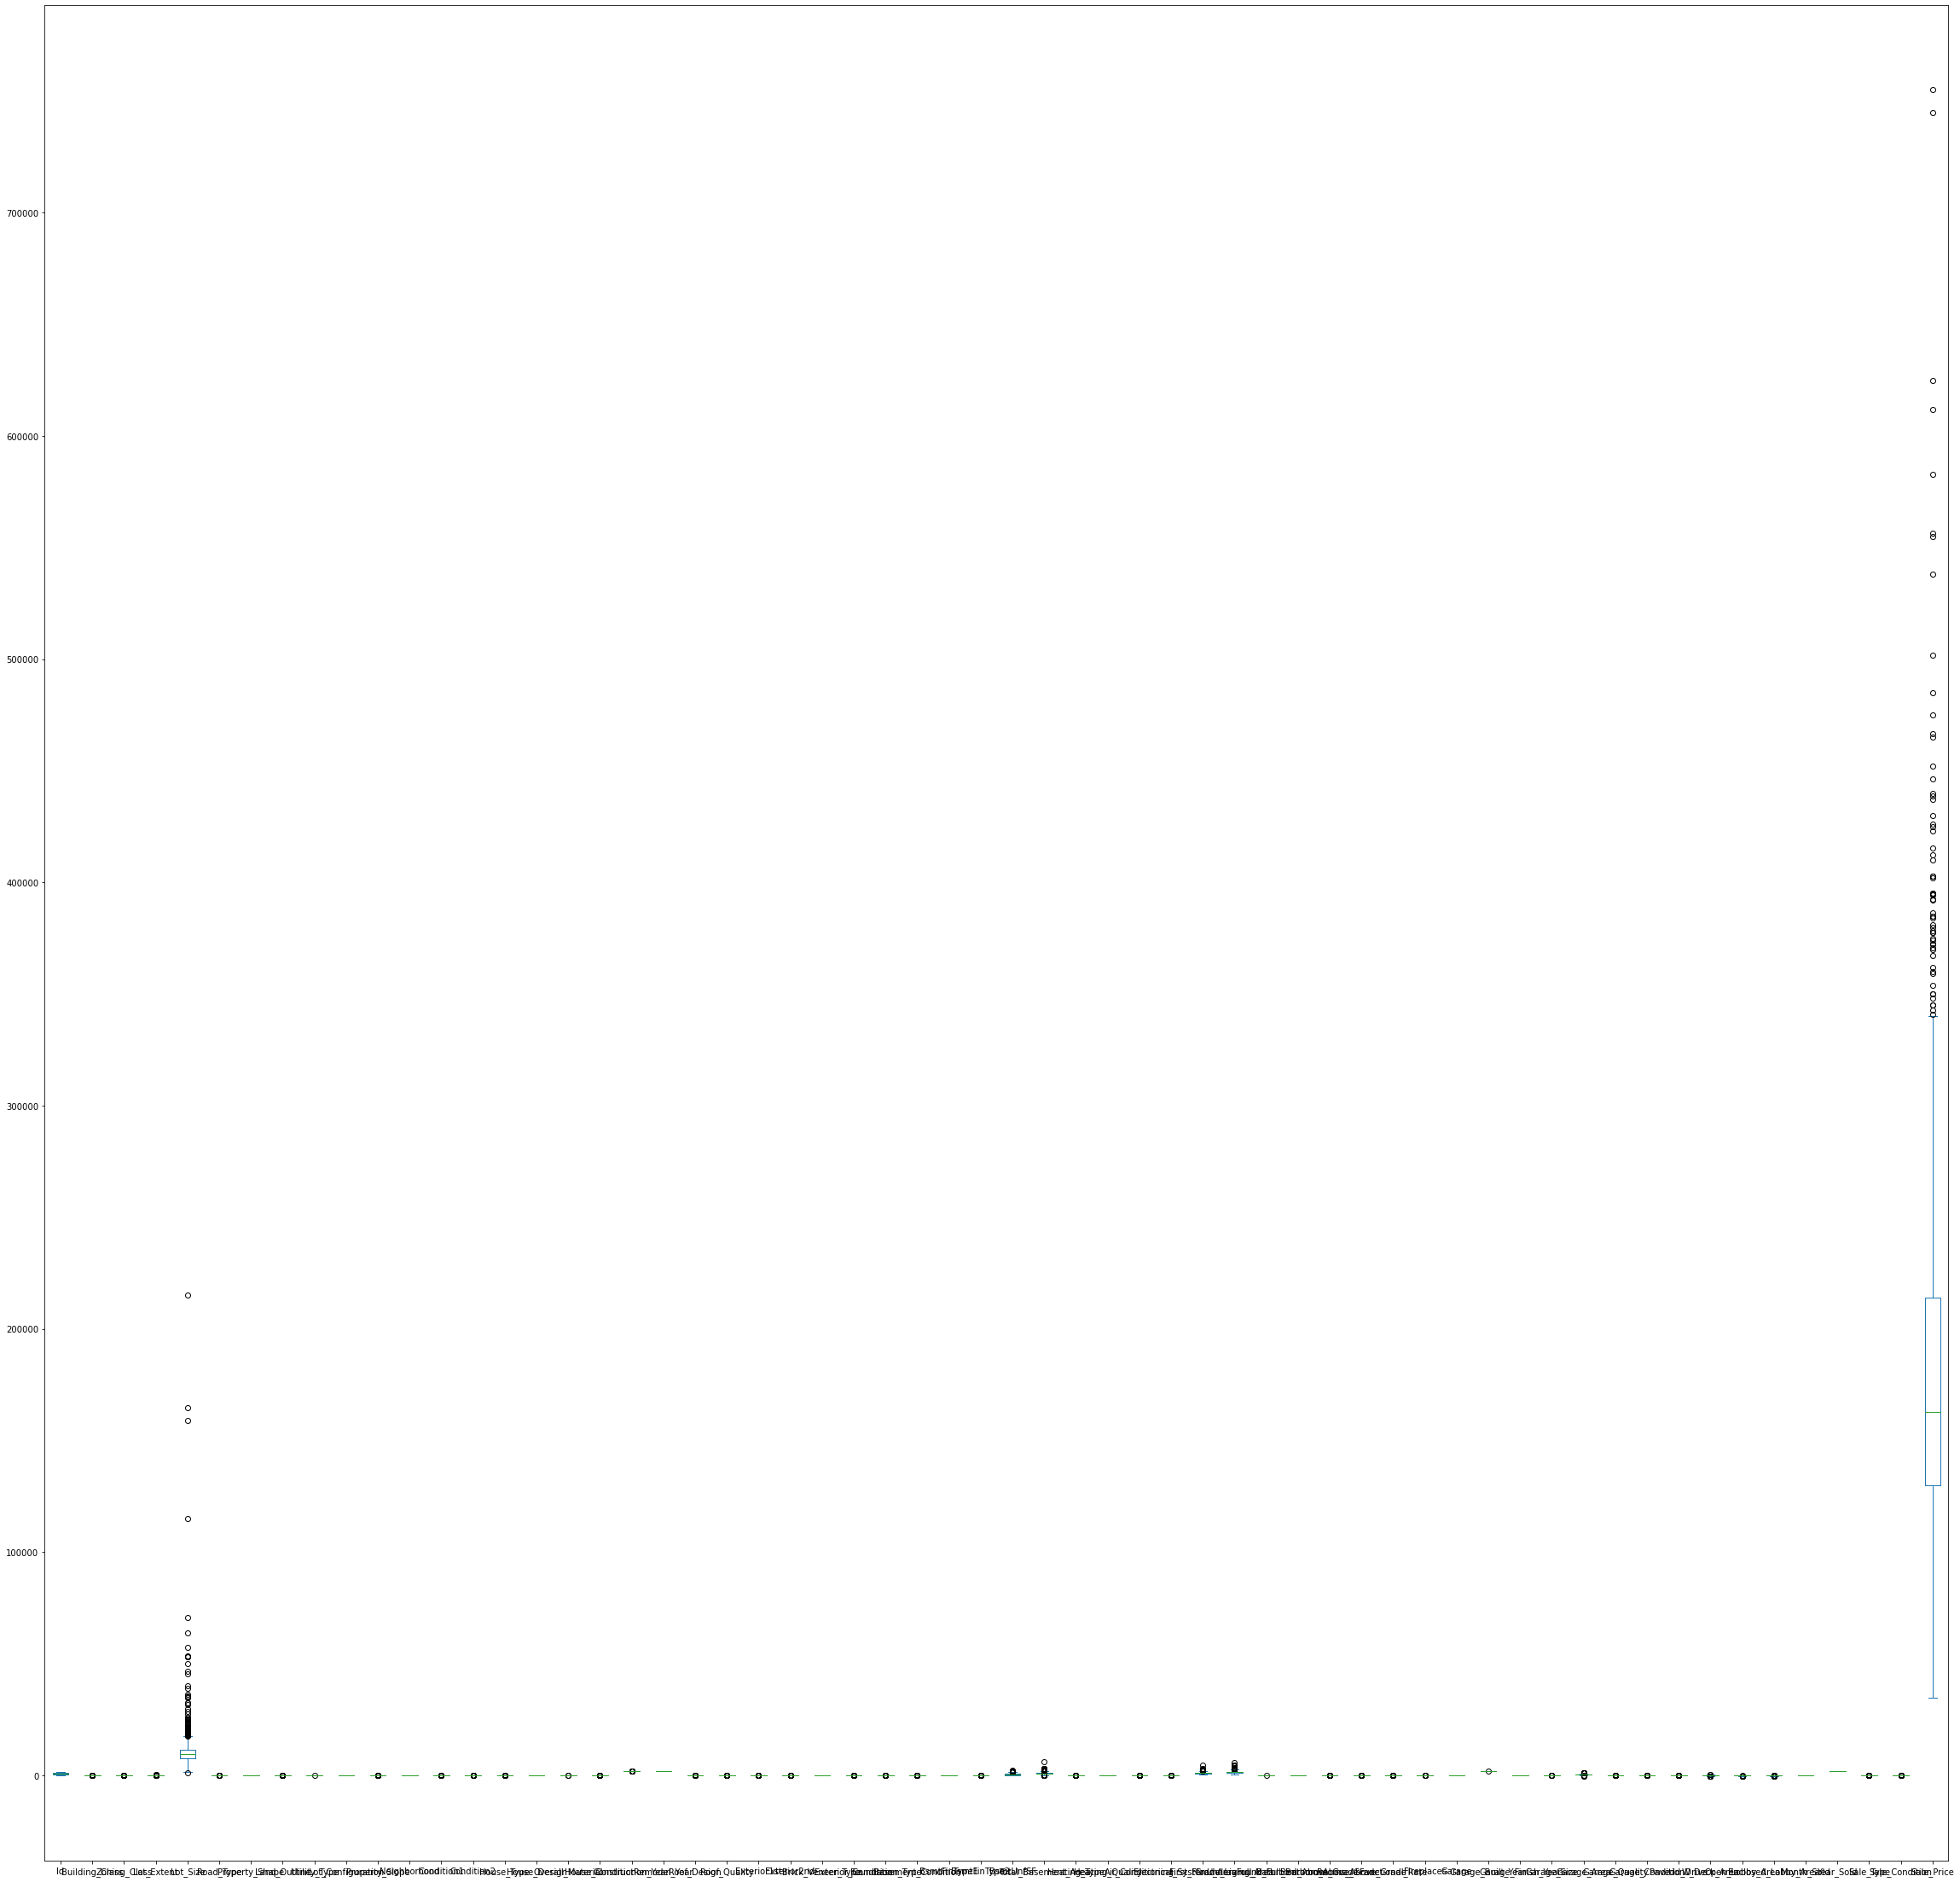

In [1470]:
train.plot.box(figsize =(40,40))
plt.show()

# Direct model build without treatment of outliers

In [1471]:
x = train.iloc[:,1:59]
y = train.iloc[:,-1]

In [1472]:
import sklearn 
from sklearn.model_selection import train_test_split

In [1473]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state = 101)  
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1021, 58), (438, 58), (1021,), (438,))

In [1474]:
from sklearn import metrics 

# linear Regression

In [1475]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [1476]:
lm.fit(x_train,y_train)

LinearRegression()

In [1477]:
pre_x_test = lm.predict(x_test) 

In [1478]:
lm.intercept_

-89306.58696385441

In [1479]:
rsq = lm.score(x_train,y_train)
rsq

0.8538191300265441

In [1481]:
ajrsq = 1-(((1-rsq)*(1021-1))/(1021-58-1))
ajrsq

0.8450057303815748

In [1483]:
error = np.abs( y_test - pre_x_test )
_MAPE = np.mean(error/y_test)*100
_MAPE

13.224669488180277

In [1484]:
def RMSLE(pred,act):
    total  = 0.0
    for i in range(len(pred)):
        pre_val = math.log(pred[i]+1)
        act_val = math.log(act[i]+1)
        total = total+((act_val-pre_val)**2)
    global tot_log_err
    tot_log_err = np.sqrt(total/(len(pred)))

In [1485]:
import math
RMSLE(pre_x_test, np.array(y_test))

In [1486]:
tot_log_err

0.1919873685618308

# LASSO

In [1487]:
from sklearn.linear_model import Lasso
lo = Lasso()

In [1488]:
lo.fit(x_train,y_train)

Lasso()

In [1489]:
pre_lo = lo.predict(x_test)

In [1490]:
rsq1 = lo.score(x_train,y_train)
rsq1

0.8538188858261044

In [1491]:
ajrsq1 = 1-(((1-rsq1)*(1021-1))/(1021-63-1))
ajrsq1

0.8441956776829953

In [1492]:
_MSE1 = metrics.mean_squared_error(y_test,pre_lo)
_MSE1

1885019392.4002335

In [1493]:
error1 = np.abs( y_test - pre_lo )
_MAPE1 = np.mean(error1/y_test)*100
_MAPE1

13.222260530602533

In [1494]:
RMSLE(pre_lo, np.array(y_test))
tot_log_err

0.19193550016736352

# XGB BOOST

In [1495]:
from xgboost import XGBRegressor
reg = XGBRegressor()

In [1496]:
reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [1497]:
pre_xgb = reg.predict(x_test)

In [1498]:
rsq1 = reg.score(x_train,y_train)
rsq1

0.9998579412514434

In [1499]:
ajrsq1 = 1-(((1-rsq1)*(1021-1))/(1021-75-1))
ajrsq1

0.9998466667475897

In [1500]:
_MSE1 = metrics.mean_squared_error(y_test,pre_xgb)
_MSE1

949579130.3765764

# skewness and outlier treatment

In [1501]:
df  = train.copy()

In [1502]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [1503]:
 scaler.fit(df)

MinMaxScaler()

In [1504]:
 scaler.transform(df)

array([[0.00000000e+00, 2.35294118e-01, 7.50000000e-01, ...,
        1.00000000e+00, 8.00000000e-01, 2.41077628e-01],
       [6.85871056e-04, 0.00000000e+00, 7.50000000e-01, ...,
        1.00000000e+00, 8.00000000e-01, 2.03582836e-01],
       [1.37174211e-03, 2.35294118e-01, 7.50000000e-01, ...,
        1.00000000e+00, 8.00000000e-01, 2.61908068e-01],
       ...,
       [9.98628258e-01, 0.00000000e+00, 7.50000000e-01, ...,
        1.00000000e+00, 8.00000000e-01, 2.43160672e-01],
       [9.99314129e-01, 2.94117647e-01, 7.50000000e-01, ...,
        1.00000000e+00, 8.00000000e-01, 3.21621997e-01],
       [1.00000000e+00, 0.00000000e+00, 7.50000000e-01, ...,
        1.00000000e+00, 8.00000000e-01, 1.48902930e-01]])

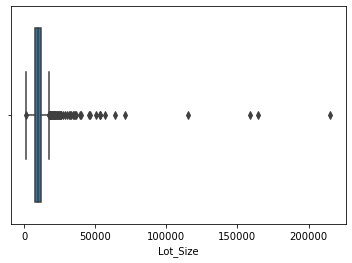

In [1505]:
sns.boxplot(x=df["Lot_Size"])
plt.show()

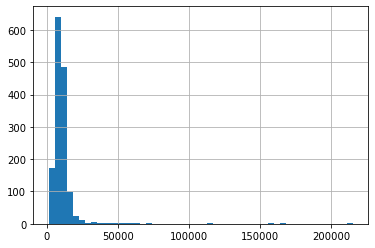

In [1506]:
df.Lot_Size.hist(bins = 50)
plt.show()

In [1507]:
df.Lot_Size.describe()

count      1459.000000
mean      10517.225497
std        9984.675721
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: Lot_Size, dtype: float64

In [1508]:
df["Lot_Size"] = np.cbrt(df["Lot_Size"])

In [1509]:
df.Lot_Size.describe()

count    1459.000000
mean       21.154903
std         3.818608
min        10.913929
25%        19.616871
50%        21.162012
75%        22.638975
max        59.930011
Name: Lot_Size, dtype: float64

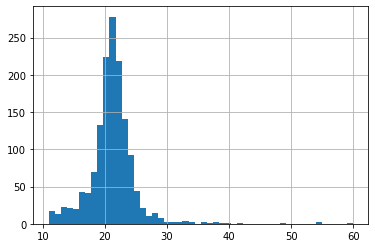

In [1510]:
df.Lot_Size.hist(bins = 50)
plt.show()

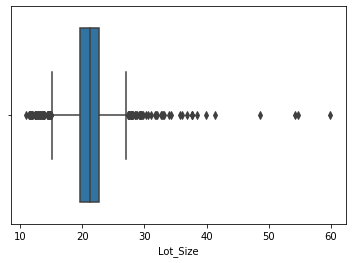

In [1511]:
sns.boxplot(x=df["Lot_Size"])
plt.show()

In [1512]:
IQR = df["Lot_Size"].quantile(0.75) - df["Lot_Size"].quantile(0.25)
print(IQR)

3.022103883988912


In [1513]:
lower_bound = df["Lot_Size"].quantile(0.25) - (3*IQR)
upper_bound = df["Lot_Size"].quantile(0.75) + (3*IQR)
print(lower_bound,upper_bound)

10.550559514519335 31.705286702441718


In [1514]:
df.loc[df["Lot_Size"]> 31.705286702441718,'Lot_Size'] =31.705286702441718

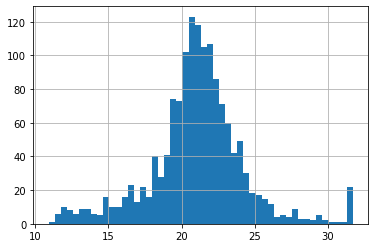

In [1515]:
df.Lot_Size.hist(bins = 50)
plt.show()

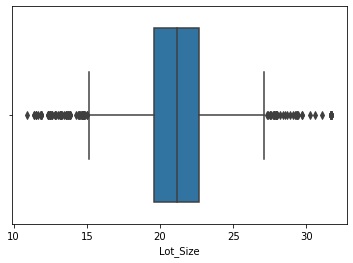

In [1516]:
sns.boxplot(x=df["Lot_Size"])
plt.show()

In [1517]:
df["Lot_Size"].skew()

0.03327746190728576

In [1518]:
df.Lot_Extent.skew()

2.4089291522103506

In [1519]:
df.Lot_Extent.describe()

count    1459.000000
mean       69.860178
std        22.034819
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: Lot_Extent, dtype: float64

In [1520]:
df["Lot_Extent"] = np.sqrt(df["Lot_Extent"])

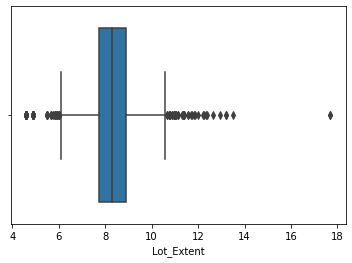

In [1521]:
sns.boxplot(x=df["Lot_Extent"])
plt.show()

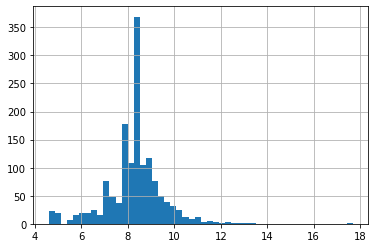

In [1522]:
df.Lot_Extent.hist(bins = 50)
plt.show()

In [1523]:
df.Lot_Extent.describe()

count    1459.000000
mean        8.261517
std         1.268313
min         4.582576
25%         7.745967
50%         8.306624
75%         8.888194
max        17.691806
Name: Lot_Extent, dtype: float64

In [1524]:
IQR = df["Lot_Extent"].quantile(0.75) - df["Lot_Extent"].quantile(0.25)
print(IQR)

1.1422277249007546


In [1525]:
lower_bound = df["Lot_Extent"].quantile(0.25) - (3*IQR)
upper_bound = df["Lot_Extent"].quantile(0.75) + (3*IQR)
print(lower_bound,upper_bound)

4.31928351771257 12.314877592017853


In [1526]:
df.loc[df["Lot_Extent"]> 12.314877592017853,'Lot_Extent'] =12.314877592017853

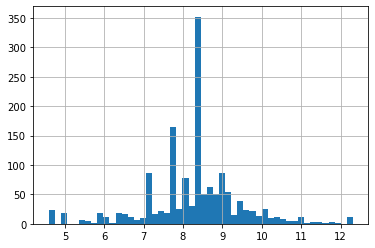

In [1527]:
df.Lot_Extent.hist(bins = 50)
plt.show()

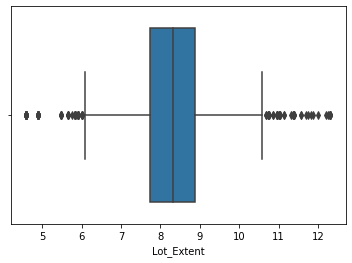

In [1528]:
sns.boxplot(x=df["Lot_Extent"])
plt.show()

In [1529]:
df.BsmtUnfSF.skew()

0.9194850391187522

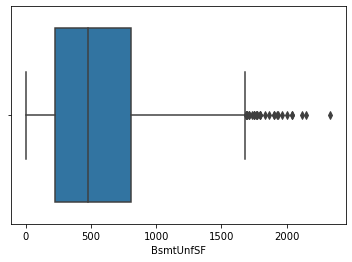

In [1530]:
sns.boxplot(x=df["BsmtUnfSF"])
plt.show()

In [1531]:
df.BsmtUnfSF.describe()

count    1459.000000
mean      567.535984
std       441.874057
min         0.000000
25%       223.500000
50%       479.000000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [1532]:
IQR = df["BsmtUnfSF"].quantile(0.75) - df["BsmtUnfSF"].quantile(0.25)
print(IQR)

584.5


In [1533]:
lower_bound = df["BsmtUnfSF"].quantile(0.25) - (2*IQR)
upper_bound = df["BsmtUnfSF"].quantile(0.75) + (2*IQR)
print(lower_bound,upper_bound)

-945.5 1977.0


In [1534]:
df.loc[df["BsmtUnfSF"]> 1977.0,'BsmtUnfSF'] =1977.0

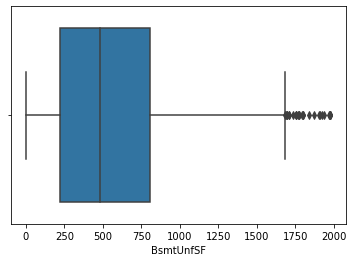

In [1535]:
sns.boxplot(x=df["BsmtUnfSF"])
plt.show()

In [1536]:
df.Total_Basement_Area.skew()

1.5249228322689758

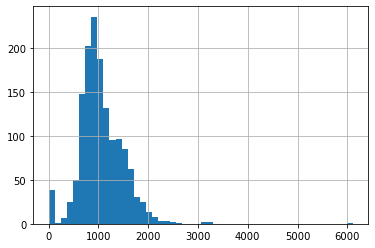

In [1537]:
df.Total_Basement_Area.hist(bins = 50)
plt.show()

In [1538]:
df.Total_Basement_Area.describe()

count    1459.000000
mean     1057.293352
std       438.824912
min         0.000000
25%       795.500000
50%       991.000000
75%      1298.500000
max      6110.000000
Name: Total_Basement_Area, dtype: float64

In [1539]:
IQR = df["Total_Basement_Area"].quantile(0.75) - df["Total_Basement_Area"].quantile(0.25)
print(IQR)

503.0


In [1540]:
lower_bound = df["Total_Basement_Area"].quantile(0.25) - (3*IQR)
upper_bound = df["Total_Basement_Area"].quantile(0.75) + (3*IQR)
print(lower_bound,upper_bound)

-713.5 2807.5


In [1541]:
df.loc[df["Total_Basement_Area"]>  2807.5,'Total_Basement_Area'] = 2807.5

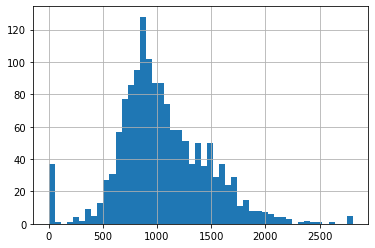

In [1542]:
df.Total_Basement_Area.hist(bins = 50)
plt.show()

In [1543]:
df.Total_Basement_Area.skew()

0.4818542216484127

In [1544]:
df.First_Floor_Area.skew()

1.3768561180573597

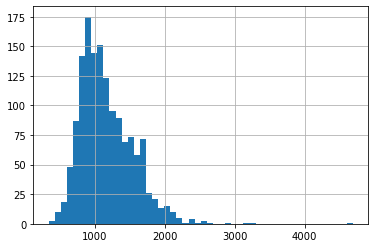

In [1545]:
df.First_Floor_Area.hist(bins = 50)
plt.show()

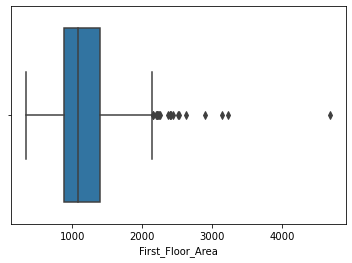

In [1546]:
sns.boxplot(x=df["First_Floor_Area"])
plt.show()

In [1547]:
df.First_Floor_Area.describe()

count    1459.000000
mean     1162.562714
std       386.712553
min       334.000000
25%       882.000000
50%      1086.000000
75%      1391.500000
max      4692.000000
Name: First_Floor_Area, dtype: float64

In [1548]:
IQR = df["First_Floor_Area"].quantile(0.75) - df["First_Floor_Area"].quantile(0.25)
print(IQR)

509.5


In [1549]:
lower_bound = df["First_Floor_Area"].quantile(0.25) - (3*IQR)
upper_bound = df["First_Floor_Area"].quantile(0.75) + (3*IQR)
print(lower_bound,upper_bound)

-646.5 2920.0


In [1550]:
df.loc[df["First_Floor_Area"]> 2920.0,'First_Floor_Area'] =2920.0

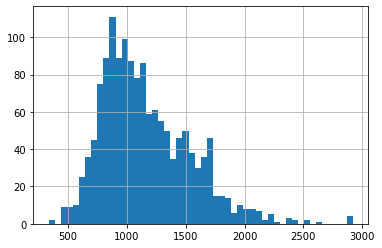

In [1551]:
df.First_Floor_Area.hist(bins = 50)
plt.show()

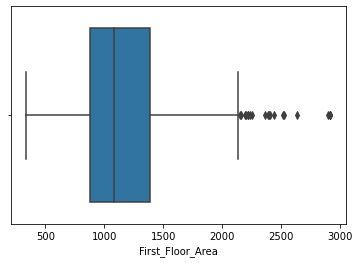

In [1552]:
sns.boxplot(x=df["First_Floor_Area"])
plt.show()

In [1553]:
df.Grade_Living_Area.skew()

1.3655021681252992

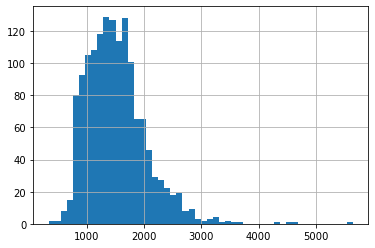

In [1554]:
df.Grade_Living_Area.hist(bins = 50)
plt.show()

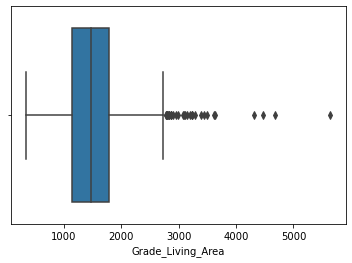

In [1555]:
sns.boxplot(x=df["Grade_Living_Area"])
plt.show()

In [1556]:
df.Grade_Living_Area.describe()

count    1459.000000
mean     1515.641535
std       525.616607
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      5642.000000
Name: Grade_Living_Area, dtype: float64

In [1557]:
IQR = df["Grade_Living_Area"].quantile(0.75) - df["Grade_Living_Area"].quantile(0.25)
print(IQR)

648.5


In [1558]:
lower_bound = df["Grade_Living_Area"].quantile(0.25) - (3*IQR)
upper_bound = df["Grade_Living_Area"].quantile(0.75) + (3*IQR)
print(lower_bound,upper_bound)

-816.5 3723.0


In [1559]:
df.loc[df["Grade_Living_Area"]> 3723.0,'Grade_Living_Area'] =3723.0

In [1560]:
df.Grade_Living_Area.describe()

count    1459.000000
mean     1512.750514
std       509.621332
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      3723.000000
Name: Grade_Living_Area, dtype: float64

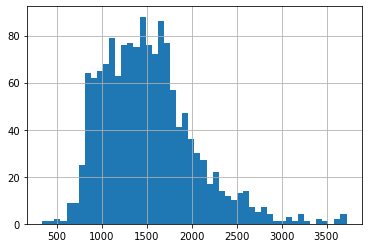

In [1561]:
df.Grade_Living_Area.hist(bins = 50)
plt.show()

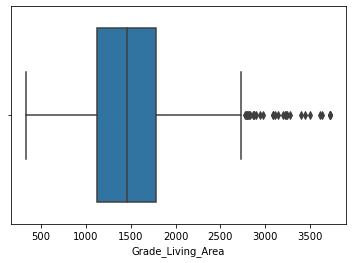

In [1562]:
sns.boxplot(x=df["Grade_Living_Area"])
plt.show()

In [1563]:
df.Overall_Material.skew()

0.21571915894120147

In [1564]:
df1 = df.copy()

In [1565]:
df1.Overall_Material.describe()

count    1459.000000
mean        6.100069
std         1.383171
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall_Material, dtype: float64

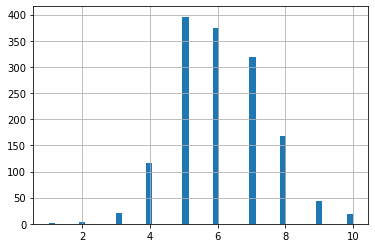

In [1566]:
df1.Overall_Material.hist(bins = 50)
plt.show()

In [1567]:
df1.Overall_Material = np.sqrt(df1.Overall_Material)

In [1568]:
df1.Overall_Material.skew()

-0.21961244955662418

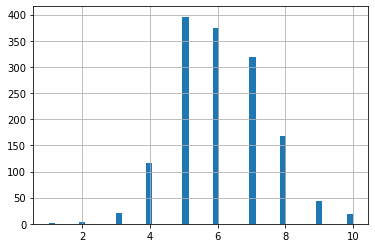

In [1569]:
df.Overall_Material.hist(bins = 50)
plt.show()

In [1570]:
df1.Sale_Price.skew()

1.8817600468196507

In [1571]:
df1.Sale_Price.describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

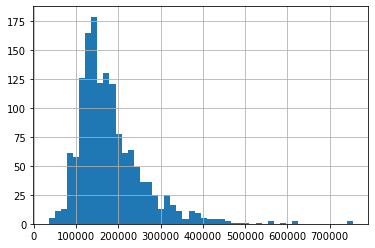

In [1572]:
df1.Sale_Price.hist(bins = 50)
plt.show()

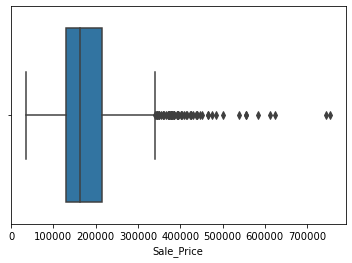

In [1573]:
sns.boxplot(x=df1["Sale_Price"])
plt.show()

In [1574]:
df1.Sale_Price.describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

In [1575]:
IQR = df1["Sale_Price"].quantile(0.75) - df1["Sale_Price"].quantile(0.25)
print(IQR)

84050.0


In [1576]:
lower_bound = df1["Sale_Price"].quantile(0.25) - (3*IQR)
upper_bound = df1["Sale_Price"].quantile(0.75) + (3*IQR)
print(lower_bound,upper_bound)

-122200.0 466150.0


In [1577]:
df1.loc[df1["Sale_Price"]> 466150,'Sale_Price'] =466150

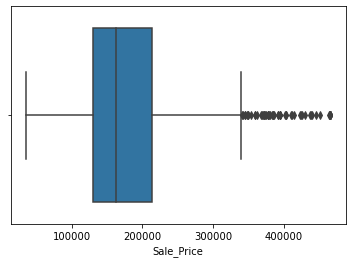

In [1578]:
sns.boxplot(x=df1["Sale_Price"])
plt.show()

# model building after outlier and skewness treatment

In [1579]:
x1 = df1.iloc[:,1:59]
y1 = df1.iloc[:,-1]
test1 = test.iloc[:,1:]

In [1580]:
import sklearn 
from sklearn.model_selection import train_test_split

In [1581]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .3,random_state = 101)  
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1021, 58), (438, 58), (1021,), (438,))

In [1582]:
from sklearn import metrics 

# linear Regression

In [1583]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [1584]:
lm.fit(x_train,y_train)

LinearRegression()

In [1585]:
pre_li = lm.predict(x_test) 

In [1586]:
rsq = lm.score(x_train,y_train)
rsq

0.8746399626757883

In [1587]:
ajrsq = 1-(((1-rsq)*(1021-1))/(1021-58-1))
ajrsq

0.8670818731073846

In [1588]:
error = np.abs( y_test - pre_x_test )
_MAPE = np.mean(error/y_test)*100
_MAPE

13.156094759483796

# lasso regression

In [1589]:
from sklearn.linear_model import Lasso
lo = Lasso()

In [1590]:
lo.fit(x_train,y_train)

Lasso()

In [1591]:
pre_lo = lo.predict(x_test)

In [1592]:
rsq1 = lo.score(x_train,y_train)
rsq1

0.8746396790280309

In [1593]:
ajrsq1 = 1-(((1-rsq1)*(1021-1))/(1021-58-1))
ajrsq1

0.8670815723582032

In [1594]:
def RMSLE(pred,act):
    total  = 0.0
    for i in range(len(pred)):
        pre_val = math.log(pred[i]+1)
        act_val = math.log(act[i]+1)
        total = total+((act_val-pre_val)**2)
    global tot_log_err
    tot_log_err = np.sqrt(total/(len(pred)))

In [1595]:
RMSLE(pre_lo, np.array(y_test))

In [1596]:
tot_log_err

0.17265050658884673

In [1597]:
error1 = np.abs( y_test - pre_lo )
_MAPE1 = np.mean(error1/y_test)*100
_MAPE1

12.222087210544526

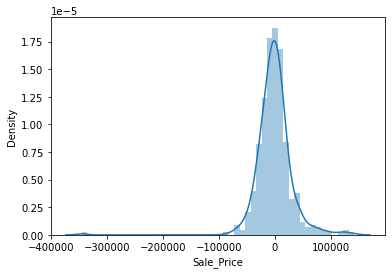

In [1598]:
sns.distplot(y_test-pre_lo)
plt.show()

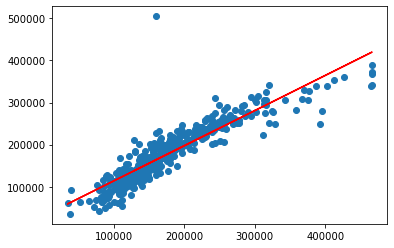

In [1599]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(y_test, pre_lo)

def myfunc(y_test):
    return slope * y_test + intercept

mymodel = list(map(myfunc, y_test))

plt.scatter(y_test, pre_lo)
plt.plot(y_test, mymodel,color = "red")
plt.show()

In [1600]:
result = lo.predict(test1)

In [1601]:
result.shape

(1459,)

In [1602]:
pdf = pd.DataFrame(result,columns =["Sale_Price"] )
print(pdf)

        Sale_Price
0     2.537741e+07
1     2.473997e+07
2     6.305477e+06
3     8.085659e+06
4     5.214350e+06
...            ...
1454  2.296895e+07
1455  1.276613e+07
1456  1.172154e+07
1457  3.666226e+06
1458  1.021873e+07

[1459 rows x 1 columns]


In [1603]:
pdf1 = pd.concat([test.iloc[:,0],pdf],axis = 1)
pdf1["Sale_Price"].value_counts()

2.537741e+07    1
8.093804e+06    1
1.796045e+07    1
2.461055e+07    1
1.492698e+07    1
               ..
1.315460e+07    1
7.721950e+06    1
1.781514e+07    1
2.081037e+07    1
1.021873e+07    1
Name: Sale_Price, Length: 1459, dtype: int64

In [1604]:
pdf1.to_csv(r"C:\Users\Yash\Downloads\result_lasso.csv",index = False)